In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import geopandas as gpd
from cartopy import config
from cartopy.feature import BORDERS
import cartopy.crs as ccrs
#import urllib.request
#import json 
import requests
from collections import defaultdict

In [713]:
venues_data = pd.read_csv('venues.csv')
calendar_data = pd.read_csv('calendar.csv')
demo_data = pd.read_csv('demographics.csv')
econ_state_data = pd.read_csv('econ_state.csv')
listings_data = pd.read_csv('listings.csv')
real_estate_data = pd.read_csv('real_estate.csv')

In [4]:
demo_data

,zipcode,population,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,45-54_years,...,"$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
0,601,17982,17982,1006,1080,1342,1352,1321,2253,2149,...,48.1,12,12.8,8.6,8.7,6.2,1.4,16.3,10816,20349
1,602,40260,40260,2006,2440,2421,2953,2865,5124,5139,...,31.4,16.3,17.9,12.2,10.6,7.7,2.9,21.2,16079,23282
2,603,52408,52408,2664,3177,3351,3685,3585,6473,6775,...,31,14.9,17.5,11.7,10.8,8.7,2.4,21.9,16804,26820
3,606,6331,6331,347,331,461,474,469,707,933,...,45.3,10.2,20,11.7,11,1.8,0,12.8,12512,15730
4,610,28328,28328,1438,1490,2044,2122,1985,3358,3778,...,26.9,14.8,23.7,15.2,9.3,7.5,1.6,18.4,17475,23360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,99923,13,13,0,0,0,0,0,0,0,...,0,46.2,53.8,0,0,0,0,0,-,N
33116,99925,826,826,65,50,47,36,60,86,82,...,7.1,6.2,21.2,11.1,12.6,17.5,9.5,39.6,38594,52706
33117,99926,1711,1711,161,124,140,113,107,224,182,...,5.5,1.9,14.1,11.1,16.8,14.5,12,43.3,51071,71580
33118,99927,123,123,0,0,0,0,0,0,32,...,28.2,0,23.1,15.4,25.6,0,0,25.6,19861,35617


In [5]:
#Note that listings, real_estate, demo_data contain zip code data
#listings may not be worth it??
zip_codes = gpd.read_file('tl_2019_us_zcta510/tl_2019_us_zcta510.shp')
counties = gpd.read_file('cb_2018_us_county_20m/cb_2018_us_county_20m.shp')
state_fips = pd.read_csv('state_fips.csv')[['Name', 'Postal Code', 'FIPS']]
counties['FIPS'] = counties['STATEFP'].astype('int32')

In [6]:
counties = counties.merge(state_fips, on='FIPS', how='left')
real_estate_data.columns

Index(['type', 'zipcode', 'city', 'state', 'metro', 'county', 'size_rank',
       '1996-04', '1996-05', '1996-06',
       ...
       '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06'],
      dtype='object', length=262)

In [7]:
real_estate_counties = counties.merge(real_estate_data, left_on=['NAME', 'Postal Code'], right_on=['county', 'state'])
real_estate_counties['2014-09']

0          841
1          838
2          842
3          886
4          960
         ...  
28194    91000
28195    85500
28196    92500
28197    89400
28198    86800
Name: 2014-09, Length: 28199, dtype: int64

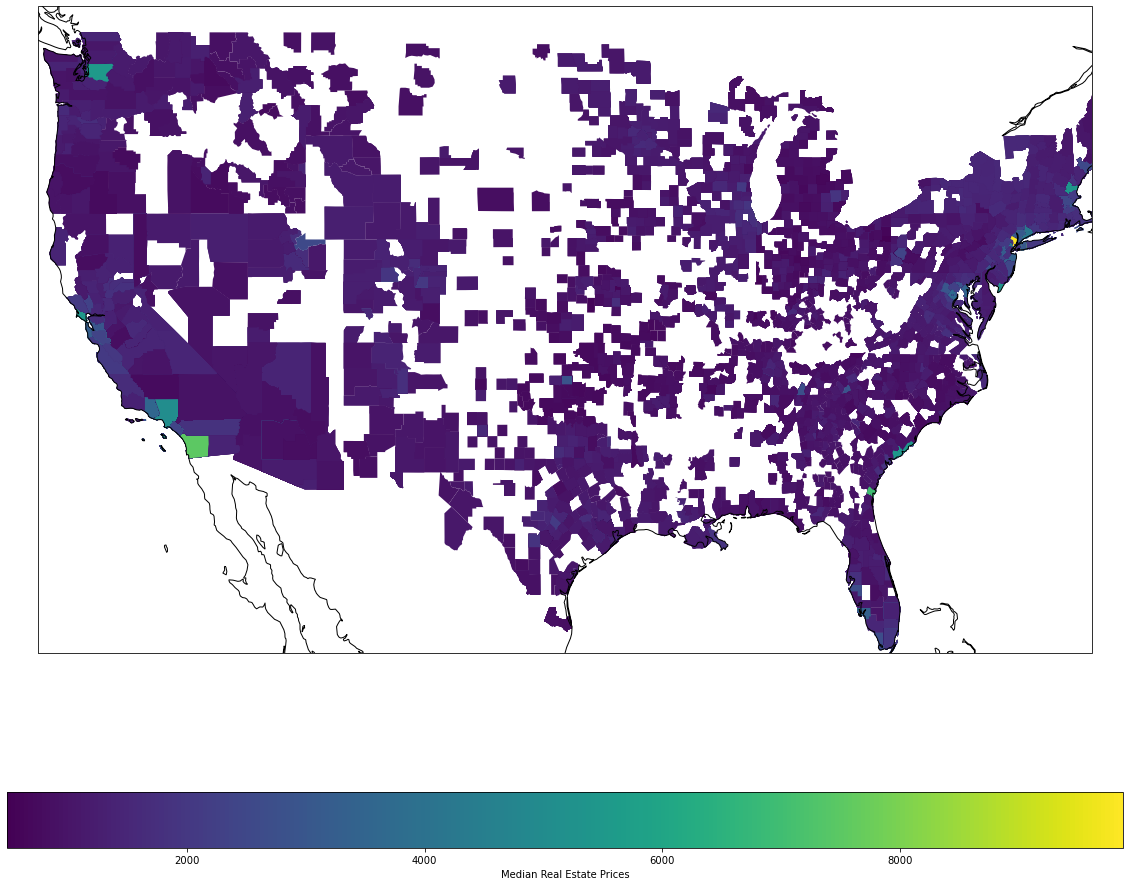

In [8]:
month_year = '2012-09'
fig1, ax1 = plt.subplots(figsize=(20,17))
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
#demo_zip.plot(column='median_household_income', cmap='viridis', ax=ax1, legend=True)
real_estate_counties.query('`{}` < 10000'.format(month_year)).plot(column=month_year, cmap='viridis', ax=ax1, legend=True, legend_kwds={'label': 'Median Real Estate Prices', "orientation": "horizontal"})#column='median_household_income', cmap='viridis', ax=ax1, legend=True)
ax1.set_xlim((-125,-70))
ax1.set_ylim((25,50))
plt.savefig('housing_prices_heatmap_{}.png'.format(month_year))

In [9]:
zip_codes.head()
zip_codes['zipcode'] = zip_codes['ZCTA5CE10'].astype('int32')
zip_codes = gpd.read_file('tl_2019_us_zcta510/tl_2019_us_zcta510.shp')

In [10]:
#demo_zip = zip_codes.merge(demo_data, on='zipcode')#, how='right')
#estate_zip = zip_codes.merge(real_estate_data.groupby('zipcode').mean(), on='zipcode')
listings_data.groupby('city').count().rsub(listings_data.groupby('city').size(), axis=0)['weekly_price'].sort_values().tail(20)

city
culver city          187
lakewood             191
burbank              195
arcadia              212
redondo beach        235
lawndale             263
venice               290
rowland heights      296
malibu               318
Asheville            325
beverly hills        391
playa del rey        443
south pasadena       619
santa monica         764
west hollywood       781
hermosa beach        975
nashville           2270
New Orleans         4530
austin              7770
los angeles        14863
Name: weekly_price, dtype: int64

In [11]:
#Create aggregated datasets for listings etc. 
print(listings_data)
#agg_listings = listings_data.groupby('zipcode').mean()
#print(listings_data['zipcode'])

       accommodates                                          amenities  \
0               2.0  {"Wireless Internet","Air Conditioning",Kitche...   
1               4.0  {TV,"Cable TV",Internet,"Wireless Internet","A...   
2               1.0  {TV,"Wireless Internet","Air Conditioning",Kit...   
3               6.0  {Internet,"Wireless Internet","Air Conditionin...   
4               6.0  {Internet,"Wireless Internet","Free Parking on...   
...             ...                                                ...   
50316           2.0  {TV,"Cable TV","Wireless Internet","Pets live ...   
50317           2.0  {"Wireless Internet",Kitchen,"Free parking on ...   
50318          10.0  {TV,"Wireless Internet","Air conditioning",Kit...   
50319           4.0  {TV,Internet,"Wireless Internet","Air conditio...   
50320           8.0  {TV,"Wireless Internet","Air conditioning",Kit...   

       availability_30  bathrooms  bed_type  bedrooms  beds  \
0                    0        1.0  Real Bed     

NameError: name 'demo_zip' is not defined

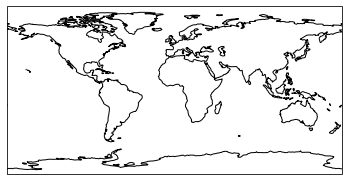

In [12]:
fig1, ax1 = plt.subplots()
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
#demo_zip.plot(column='median_household_income', cmap='viridis', ax=ax1, legend=True)
print(demo_zip.columns)
demo_zip.plot(column='$100,000_or_more', cmap='viridis', ax=ax1)#column='median_household_income', cmap='viridis', ax=ax1, legend=True)
ax1.set_xlim((-125,-70))
ax1.set_ylim((25,50))

NameError: name 'estate' is not defined

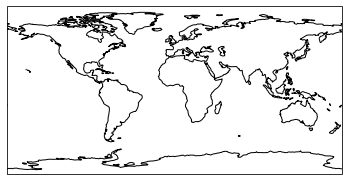

In [13]:
fig1, ax1 = plt.subplots()
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines()
#demo_zip.plot(column='median_household_income', cmap='viridis', ax=ax1, legend=True)
estate.plot(column='median_household_income', cmap='viridis', ax=ax1, legend=True)#column='median_household_income', cmap='viridis', ax=ax1, legend=True)
ax1.set_xlim((-125,-70))
ax1.set_ylim((25,50))

In [14]:
#tidy the real estate data
real_estate_tidy = real_estate_data.melt(id_vars=['type', 'zipcode', 'city', 'state', 'metro', 'county', 'size_rank'],var_name='date', value_name='monthly_avg_price')

In [15]:
real_estate_tidy.head()

,type,zipcode,city,state,metro,county,size_rank,date,monthly_avg_price
0,ZHVI,10025,New York,NY,New York,New York,1,1996-04,NaN
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,1996-04,146700.0
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,1996-04,198000.0
3,ZHVI,79936,El Paso,TX,El Paso,El Paso,4,1996-04,70800.0
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,1996-04,102300.0


In [16]:
#tidy the demographic data into two 
print(demo_data.columns)
demo_data_tidy = demo_data.melt(id_vars=['zipcode', 'population', 'households', 'median_household_income', 'mean_household_income'], var_name = 'ranges', value_name = 'counts')

Index(['zipcode', 'population', '5_years_or_less', '5-9_years', '10-14_years',
       '15-19_years', '20-24_years', '25-34_years', '35-44_years',
       '45-54_years', '55-59_years', '60-64_years', '65-74_years',
       '75-84_years', '85_years_or_more', 'households', '$9,999_or_less',
       '$10,000-$14,999', '$15,000-$24,999', '$25,000-$34,999',
       '$35,000-$49,999', '$50,000-$64,999', '$65,000-$74,999',
       '$75,000-$99,999', '$100,000_or_more', 'median_household_income',
       'mean_household_income'],
      dtype='object')


In [17]:
demo_data_tidy.head()
demo_data_tidy['range_type'] = demo_data_tidy['ranges'].apply(lambda x: 'income_range' if x[0] == '$' else 'age_range')

440131      $9,999_or_less
473251     $10,000-$14,999
506371     $15,000-$24,999
539491     $25,000-$34,999
572611     $35,000-$49,999
605731     $50,000-$64,999
638851     $65,000-$74,999
671971     $75,000-$99,999
705091    $100,000_or_more
Name: ranges, dtype: object
440131    2682
473251     7.9
506371     6.4
539491    16.9
572611     9.2
605731    10.9
638851    12.2
671971     8.2
705091    31.3
Name: counts, dtype: object


<BarContainer object of 9 artists>

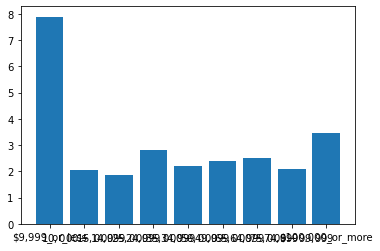

In [18]:
temp_demo = demo_data_tidy.query('zipcode == 30002 & range_type == "income_range"')
print(temp_demo['ranges'])
print(temp_demo['counts'])
plt.bar(height=np.log(temp_demo['counts'].astype('float64')), x=temp_demo['ranges'])
#demo_data_tidy

1994.0


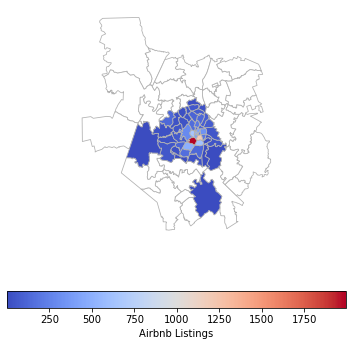

In [846]:
#Here's a calculation of how many AirBnb houses lie in a particular zip code
#first, merge aggregated zipcodes with Austin (or whatever city) shapefile
#lol, before we go too far we should double check LA to see if the methodology is correct
listings_counts = listings_data.groupby('zipcode').count()['city']
listings_counts = listings_counts[:-1]
listings_counts.index = listings_counts.index.str[:5].astype('float64')
city_zipcodes = gpd.read_file('austin/austin_area_zip_codes.shp')
#city_zipcodes = gpd.read_file('nashville/geo_export_ce95ea06-82ce-4673-82c7-c568df5a3eec.shp')
#city_zipcodes = gpd.read_file('la/b982f3c3-ffe6-4e4a-b8e6-2bd1eb2c70642020328-1-26h3sc.00ox.shp')
#city_zipcodes = gpd.read_file('nola/geo_export_82c5f368-18be-4714-b4da-8f8faa2ab177.shp')
#city_zipcodes['zipcode'] = city_zipcodes['zcta5ce10'].astype('float64')
city_zipcodes['zipcode'] = city_zipcodes['zipcode'].astype('float64')
#city_zipcodes['zipcode'] = city_zipcodes['zip'].astype('float64')
#city_zip_counts = city_zipcodes.merge(listings_counts, how='left', left_on='zip', right_index=True)
city_zip_counts = city_zipcodes.merge(listings_counts, how='left', left_on='zipcode', right_index=True)
print(max(city_zip_counts['city']))

#then plot graph as shown below
data = city_zip_counts
na = data[pd.isna(data['city'])]
#data
fig, ax = plt.subplots(1, figsize=(5,5))
ax.axis('off')
na.plot(color='white', linewidth=0.8, ax=ax, edgecolor='0.7')
data.plot(column='city', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.7', legend=True, legend_kwds={'orientation':'horizontal', 'label':'Airbnb Listings', })
fig.tight_layout()
city = 'austin'
feature = 'listings'
fig.savefig(city+'_'+feature+'.png', format='png', dpi=1000)
plt.show()

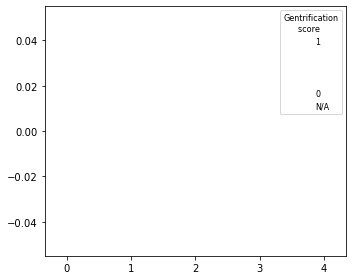

In [833]:
plt.rcParams["figure.figsize"] = [5,4]
plt.rcParams['legend.title_fontsize'] = 8
fig, ax = plt.subplots()

index = np.arange(5)
bar_width = 0.25

rects1 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label='1')
rects2 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label=' ')
rects2 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label=' ')
rects2 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label=' ')
rects2 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label='0')
rects4 = ax.bar(index, [0]*5, bar_width, color='w', edgecolor='w', label='N/A')

#ax.legend(title='    Airbnb    \n   Listings   ', prop={'size': 8}, fontsize=8)
ax.legend(title='Gentrification\n      score   ', prop={'size': 8}, fontsize=8)

fig.tight_layout()

plt.show()
fig.savefig('legend_l.png', format='png', dpi=1000)

In [887]:
#Now, let's see if we can try to fetch gentrification data and retrieve a similar plot afterwards...
demo_millenial = demo_data_tidy.query('ranges == "25-34_years" & population > 0')
#print(demo_data_tidy.tail()) 
#four components of score: age proportion growth, education level growth, median income growth, median gross rent growth, 
#honestly I think comparing 2011 to 2019 levels should be fine, this is recent data after all...
#year = '2011'

#State fips number
#southern_states_fips = ['10', '11', '12', '13', '24', '37', '45', '51', '54', '01', '21', '28', '47', '05', '22', '40', '48', '02']
southern_states_fips = ['10', '11', '12', '13', '24', '37', '45', '51', '54', '01', '21', '28', '47', '05', '22', '40', '48']#, '02']
#['01', 2, 37, 40, 10, 12, 13, 45, 47, 48, 51, 21, 22, 54, 24, 28}
data_dicts_v2 = defaultdict(lambda: defaultdict())
for state_no in southern_states_fips:
    print(state_no)
    for ind, year in enumerate(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']):
        data_dict = defaultdict(lambda: [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
        #median household income (12 is median, 13 is mean)
        median_income_url = 'https://api.census.gov/data/{}/acs/acs5/subject?get=NAME,S1901_C01_012E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, state_no)
        mean_income_url = 'https://api.census.gov/data/{}/acs/acs5/subject?get=NAME,S1901_C01_013E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, state_no)
        #median gross rent
        rent_url = 'https://api.census.gov/data/{}/acs/acs5?get=NAME,B25064_001E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, state_no)
        #25 years and older with bachelor's degree or higher
        edu_url = 'https://api.census.gov/data/{}/acs/acs5/subject?get=NAME,S1501_C0{}_015E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, ind + 1, state_no)
        #25-34, split into two groups
        #age_url = 'https://api.census.gov/data/{}/acs/acs5/subject?get=NAME,S0101_C0{}_007E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, ind + 1, state_no)
        #age_url_2 = 'https://api.census.gov/data/{}/acs/acs5/subject?get=NAME,S0101_C0{}_008E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, ind + 1, state_no)
        for i, url in enumerate([median_income_url, mean_income_url, rent_url, edu_url]):#, age_url, age_url_2]):
            data = requests.get(url).json()
            #with urllib.request.urlopen(url) as open_url:
                #data = json.loads(open_url.read().decode())
            for row in data[1:]:
                data_dict[int(row[3])][i] = float(row[1]) #second part of age bracket
        data_dicts_v2[state_no][year] = data_dict

10


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [847]:

#calculate gentrification scores based off of above code
scores = []
state_code = '48' #Texas
#state_code = '22' #Louisiana
for zipcode in data_dicts[state_code]['2011']:
    gent_score = 0
    #print(zipcode, i)
    #print(data_dicts[0][zipcode])
    #print(data_dicts[1][zipcode])
    to_append = [str(zipcode)]
    for i in range(4):
        if data_dicts[state_code]['2011'][zipcode][i] <= 0 or data_dicts[state_code]['2017'][zipcode][i] <= 0:
            continue
        to_append.append(data_dicts[state_code]['2011'][zipcode][i])
        to_append.append(data_dicts[state_code]['2017'][zipcode][i])
        #percentile_change = (data_dicts[1][zipcode][i] - data_dicts[0][zipcode][i]) / data_dicts[0][zipcode][i]
        #percentile_change = data_dicts[1][zipcode][i]# - data_dicts[0][zipcode][i]
        #gent_score += percentile_change /4
    scores.append(to_append)
score_data = pd.DataFrame(scores, columns=['zipcode', 'income2011', 'income2017', 'rent2011', 'rent2017', 'edu2011', 'edu2017', 'age2011', 'age2017'])
score_data['gentscore2011'] = (score_data['income2011'].rank(pct=True) + score_data['rent2011'].rank(pct=True))/2
score_data['gentscore2017'] = (score_data['income2017'].rank(pct=True) + score_data['rent2017'].rank(pct=True))/2
score_data['gentrification_score'] = score_data['gentscore2017'] - score_data['gentscore2011']

In [771]:
score_data

,zipcode,income2011,income2017,rent2011,rent2017,edu2011,edu2017,gentscore2011,gentscore2017,gentrification_score
0,70782,60729.0,24459.0,55203.0,35436.0,NaN,NaN,0.720993,0.047916,-0.673077
1,70785,63019.0,59959.0,68796.0,73170.0,644.0,780.0,0.883406,0.817165,-0.066241
2,70003,57140.0,55839.0,70592.0,72067.0,873.0,882.0,0.856095,0.785050,-0.071046
3,70006,53868.0,62532.0,72683.0,84202.0,977.0,984.0,0.841040,0.892898,0.051857
4,70031,58177.0,72955.0,68131.0,72948.0,NaN,NaN,0.850462,0.878523,0.028061
...,...,...,...,...,...,...,...,...,...,...
510,71367,51974.0,40759.0,59493.0,50907.0,NaN,NaN,0.722480,0.351609,-0.370871
511,71403,46277.0,55592.0,59091.0,77383.0,525.0,710.0,0.650602,0.814876,0.164275
512,71414,28750.0,14688.0,33635.0,34798.0,914.0,555.0,0.082752,0.019110,-0.063642
513,71419,38344.0,41417.0,50410.0,53823.0,531.0,347.0,0.391363,0.401216,0.009854


In [438]:
#Populate metro_zipcodes dictionary with corresponding zipcodes
#{'Nashville': [37211, 37013, ...], 'Austin': [78613,78704,78745...]}
metro_zipcodes = {}
for index, row in real_estate_data.iterrows():
    if (row['metro'] not in metro_zipcodes):
        temp_list = [row['zipcode']]
        metro_zipcodes[row['metro']] = temp_list
    else:
        temp_list_2 = metro_zipcodes[row['metro']]
        temp_list_2.append(row['zipcode'])
        metro_zipcodes[row['metro']] = temp_list_2

In [437]:
#The Ellen & O’Regan model calls an area “gentrified” if the ratio of the neighb
#household income at the start of the decade, compared to the metro average hous
#income, is less than 0.7—and there needs to be at least a 10 percentage-point i
#in the ratio of neighborhood to metro average household income over the past de
def gentrification_score(zipcode, fips):
    fips = '{0:02d}'.format(fips)
    if zipcode == None:
        return np.nan #edge case
    
    this_zip = demo_data[demo_data.zipcode == zipcode]
    # mean income for a zipcode (aka neighborhood)
    #average_neighborhood_income = this_zip["mean_household_income"]
    mean_nbr_inc_1 = sum([data_dicts[fips][year][zipcode][0] for year in ['2011', '2012', '2013']])/3
    mean_nbr_inc_2 = sum([data_dicts[fips][year][zipcode][0] for year in ['2016', '2017', '2018']])/3
    #mean_nbr_inc_1 = sum([data_dicts[fips][year][zipcode][0] for year in ['2011']])/1
    #mean_nbr_inc_2 = sum([data_dicts[fips][year][zipcode][0] for year in ['2016']])/1
    if mean_nbr_inc_1 < 0 or mean_nbr_inc_2 < 0:
        return np.nan #unclean sum
    #average_neighborhood_income = data_dicts[1][zipcode][0] - data_dicts[0][zipcode][0]
    average_neighborhood_income = mean_nbr_inc_2 - mean_nbr_inc_1
    #average_neighborhood_income = pd.to_numeric(average_neighborhood_income, errors='coerce') #fill with nans for invalid input

    # mean income for a metro area
    metro_name = getMetro(zipcode)
    average_metro_income = getMetroIncome(metro_name, fips)
    if average_metro_income == np.nan:
        return np.nan
    #if len(average_neighborhood_income) == 0:
        #return np.nan #no data found
    
    #print(average_neighborhood_income, average_metro_income)

    # ratio of mean income for a zipcode/mean income for a metro area
    #print(average_neighborhood_income, average_metro_income, metro_name)
    return average_neighborhood_income/average_metro_income
    #return ((average_neighborhood_income/average_metro_income).values)[0]

#given a zipcode, get the metro name
def getMetro(zipcode):
    for k, v in metro_zipcodes.items():
        if zipcode in metro_zipcodes[k]:
            return (k)
    
#given a metro, get the average income for all zipcodes corresponding to that metro
def getMetroIncome(metro, fips):
    average_metro_income = 0
    if metro not in metro_zipcodes:
        return np.nan #better than crashing
    total_len = 0
    for zipcode in metro_zipcodes[metro]:
        '''
        this_zip = demo_data[demo_data.zipcode == zipcode]
        if len(this_zip['mean_household_income']) == 0: #probably not found
            #print(this_zip)
            continue #we should skip this one
        average_metro_income = average_metro_income + float(this_zip["mean_household_income"])
        total_len += 1
        '''
        if zipcode not in data_dicts[fips]['2011']:
            continue
        mean_house_inc_1 = sum([data_dicts[fips][year][zipcode][0] for year in ['2011', '2012', '2013']])/3
        mean_house_inc_2 = sum([data_dicts[fips][year][zipcode][0] for year in ['2016', '2017', '2018']])/3
        #mean_house_inc_1 = sum([data_dicts[fips][year][zipcode][0] for year in ['2011']])/1
        #mean_house_inc_2 = sum([data_dicts[fips][year][zipcode][0] for year in ['2016']])/1
        if mean_house_inc_1 < 0 or mean_house_inc_2 < 0:
            continue #this means there was some invalid values
        #print(zipcode, mean_house_inc_1, mean_house_inc_2)
        average_metro_income += mean_house_inc_2 - mean_house_inc_1
        total_len += 1
        #average_metro_income += mean_house_inc
    average_metro_income = average_metro_income/total_len
    return average_metro_income

In [385]:
#gentrification_score(78739)

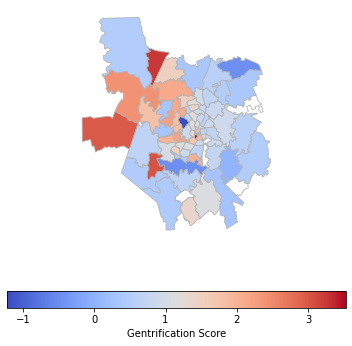

In [850]:
#Now plot the desired figure
#print(type(city_zipcodes['zip']))
score_data['zipcode'] = score_data['zipcode'].astype('float64')
#print(score_data)
zip_scores = city_zipcodes.merge(score_data, how='left', left_on='zipcode', right_on='zipcode')
#print(score_data.columns)
#print(zip_scores)
#zip_scores['gent_perc'] = zip_scores['gentrification_score'].rank(pct=True)
city_zipcodes['gentrification_score'] = city_zipcodes['zipcode'].astype('int32').map(lambda code: gentrification_score(code, 48))

#then plot graph as shown below
#data = zip_scores
data = city_zipcodes
na = data[pd.isna(data['gentrification_score'])]
#data
fig, ax = plt.subplots(1, figsize=(5,5))
ax.axis('off')
na.plot(color='white', linewidth=0.8, ax=ax, edgecolor='0.7')
data.plot(column='gentrification_score', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.7', legend=True, legend_kwds={'orientation':'horizontal', 'label':'Gentrification Score'})
fig.tight_layout()
city = 'austin'
feature = 'gent_score'
fig.savefig(city+'_'+feature+'.png', format='png', dpi=1000)
plt.show()

In [352]:
demo_data['mean_household_income'] = pd.to_numeric(demo_data['mean_household_income'], errors='coerce')
southern_states = ['MD', 'DE', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'FL', 'GA', 'AL', 'MS', 'LA', 'AR', 'TX', 'OK']
#df.apply(lambda x: some_func(a = x['a'], b = x['b'], c = x['c']), axis=1)
#real_estate_data
real_estate_south = real_estate_data[real_estate_data['state'].isin(southern_states)].merge(state_fips, left_on='state', right_on='Postal Code', how='left')
print({i for i in real_estate_south['FIPS']})

ellen_zipscores = real_estate_south[['zipcode', 'FIPS']]
#ellen_zipscores['gentrification_score'] = real_estate_south['zipcode'].astype('int32').map(lambda code: gentrification_score(code))
ellen_zipscores['gentrification_score'] = ellen_zipscores.apply(lambda x: gentrification_score(x['zipcode'], x['FIPS']), axis=1)

{1, 37, 5, 40, 10, 12, 13, 45, 47, 48, 51, 21, 22, 54, 24, 28}


/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [357]:
ellen_zipscores.to_csv('southern_gentrification_scores.csv')
ellen_zipscores

,zipcode,FIPS,gentrification_score
0,79936,48,3.749817
1,77084,48,0.679543
2,75070,48,NaN
3,77449,48,1.512082
4,32162,12,NaN
...,...,...,...
10058,29074,45,NaN
10059,21840,24,4.283792
10060,29915,45,8.459861
10061,20687,24,-13.503183


In [ ]:
#State fips number
state_no = '47'
data_dicts = []
for ind, year in enumerate(['2011', '2017']):
    data_dict = defaultdict(lambda: [np.nan, np.nan, np.nan, np.nan])
    #median household income (first is median, second is mean)
    income_url = 'https://api.census.gov/data/{}/acs/acs5/subject?get=NAME,S1901_C01_012E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, state_no)
    #median gross rent
    rent_url = 'https://api.census.gov/data/{}/acs/acs5?get=NAME,B25064_001E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, state_no)
    #25 years and older with bachelor's degree or higher
    edu_url = 'https://api.census.gov/data/{}/acs/acs5/subject?get=NAME,S1501_C0{}_015E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, ind + 1, state_no)
    #25-34, split into two groups
    age_url = 'https://api.census.gov/data/{}/acs/acs5/subject?get=NAME,S0101_C0{}_007E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, ind + 1, state_no)
    age_url_2 = 'https://api.census.gov/data/{}/acs/acs5/subject?get=NAME,S0101_C0{}_008E&for=zip%20code%20tabulation%20area:*&in=state:{}'.format(year, ind + 1, state_no)
    for i, url in enumerate([income_url, rent_url, edu_url, age_url_2]):
        with urllib.request.urlopen(url) as open_url:
            data = json.loads(open_url.read().decode())
            for row in data[1:]:
                data_dict[int(row[3])][i] = float(row[1]) #second part of age bracket
    data_dicts.append(data_dict)

Index(['accommodates', 'availability_30', 'bathrooms', 'bedrooms', 'beds',
       'has_availability', 'host_id', 'id', 'latitude', 'longitude',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'count'],
      dtype='object')


/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


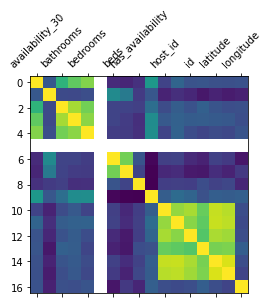

In [476]:
#sentiment analysis and LDA of airbnb reviews
#listings_nc = listings_data[listings_data['state'] == 'LA']
#plt.scatter(x=listings_nc['longitude'], y=listings_nc['latitude'])
#plt.show()
listings_counts = listings_data.groupby('zipcode').count()
listings_avg = listings_data.groupby('zipcode').mean()
listings_avg['count'] = listings_counts['city']
print(listings_avg.columns)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(listings_avg.corr())
ax.set_xticklabels(listings_avg,rotation=45)
plt.show()

In [531]:
#process the data
calendar_data['price_val'] = calendar_data['price'].str[1:].replace(',', '', regex=True).astype('float64')
calendar_counts = calendar_data.groupby(['date', 'metro_area']).count()
calendar_means = calendar_data.groupby(['date', 'metro_area']).mean()
print(calendar_data.head())
calendar_counts.reset_index(inplace=True)

   listing_id        date available price metro_area  price_val
0      665257  2016-04-22         f   NaN  asheville        NaN
1      665257  2016-04-23         f   NaN  asheville        NaN
2      665257  2016-04-24         f   NaN  asheville        NaN
3      665257  2016-04-25         f   NaN  asheville        NaN
4      665257  2016-04-26         f   NaN  asheville        NaN


In [535]:
print(calendar_means)
print(calendar_counts)

                          listing_id   price_val
date       metro_area                           
2016-04-20 asheville    6.229534e+06  117.200000
2016-04-21 asheville    5.908238e+06  129.042254
2016-04-22 asheville    6.040477e+06  147.690000
2016-04-23 asheville    6.159317e+06  171.932773
2016-04-24 asheville    6.157866e+06  130.261421
...                              ...         ...
2018-05-28 new_orleans  1.122288e+07  225.162173
2018-05-29 new_orleans  1.122288e+07  224.453947
2018-05-30 new_orleans  1.122288e+07  224.673511
2018-05-31 new_orleans  1.122288e+07  231.811553
2018-06-01 new_orleans  1.122288e+07  252.726566

[1831 rows x 2 columns]
            date   metro_area  listing_id  available  price  price_val
0     2016-04-20    asheville         168        168     60         60
1     2016-04-21    asheville         396        396    142        142
2     2016-04-22    asheville         628        628    100        100
3     2016-04-23    asheville         850        850  

{'asheville', 'nashville', 'austin', 'new_orleans', 'LA'}


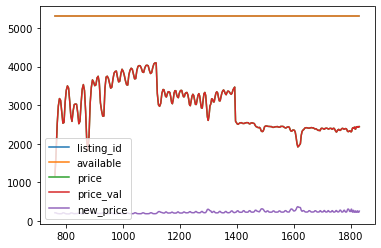

In [598]:
#calendar_counts.reset_index(inplace=True)
#calendar_counts['date'] = pd.to_datetime(calendar_counts['date'])
#calendar_counts = calendar_counts.set_index('date')
#calendar_counts[calendar_counts['listing_id'] == 'asheville'].plot()
print({i for i in calendar_counts['metro_area']})
#calendar_counts['new_price'] = calendar_means.reset_index()['price_val']
city = 'new_orleans'
calendar_counts[calendar_counts['metro_area'] == city].plot()
plt.savefig('{}_calendar_agg.png'.format(city))
#calendar_counts.groupby('metro_area')['listing_id'].plot()

<AxesSubplot:xlabel='date'>

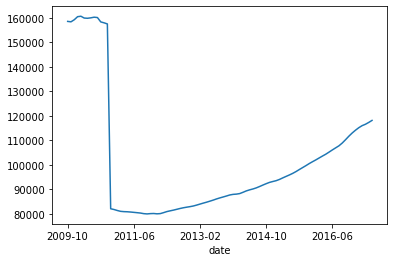

In [607]:
import datetime
real_estate_asheville = real_estate_tidy[real_estate_tidy['metro'] == 'Nashville'].groupby('date').mean()
#real_estate_asheville[real_estate_asheville['date'] >= 2016]
#real_estate_asheville['date'] = pd.to_datetime(real_estate_asheville['date'])
fig, ax = plt.subplots()
#print(real_estate_asheville)
real_estate_asheville['monthly_avg_price'].loc['2009-1-1':'2019-1-1'].plot(ax=ax)
#ax.plot_date(x, y, markerfacecolor='CornfloerBlue', markeredgecolor='white')
#fig.autofmt_xdate()
#ax.set_xlim([datetime.date(1998, 1,1), datetime.date(2018,1,1)])
#ax.set_ylim([0, 5])

In [613]:
listings_data.columns

Index(['accommodates', 'amenities', 'availability_30', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'cancellation_policy', 'city', 'has_availability',
       'host_id', 'id', 'instant_bookable', 'latitude', 'longitude',
       'metropolitan', 'name', 'price', 'property_type',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'room_type', 'state',
       'weekly_price', 'zipcode'],
      dtype='object')

In [671]:
demo_data['zip'] = demo_data['zipcode'].astype('str')
listings_joined = listings_avg.merge(demo_data, left_index=True, right_on='zip')

print(listings_joined)
#plt.hist(listings_joined['count'])

#plt.scatter(x=listings_joined['25-34_years'], y=listings_joined['count'])

       accommodates  availability_30  bathrooms  bedrooms      beds  \
11903      4.500000        16.413793   1.500000  1.775862  2.137931   
11905      3.000000        15.000000   1.000000  1.500000  1.500000   
11914      4.894737        13.684211   1.605263  2.210526  2.473684   
11916      6.000000         1.500000   1.500000  2.000000  2.000000   
11946      6.090909        18.090909   2.409091  2.272727  3.636364   
...             ...              ...        ...       ...       ...   
30831      2.562500        12.625000   1.218750  1.187500  1.625000   
30832      3.388889        12.388889   1.472222  1.722222  1.722222   
30833      2.333333        17.666667   1.666667  1.666667  1.666667   
30841      2.500000        24.000000   0.500000  0.000000  2.000000   
30842     16.000000        30.000000   0.000000  1.000000  1.000000   

       has_availability       host_id            id   latitude   longitude  \
11903               NaN  5.004964e+07  1.122750e+07  36.047936  -86.6

In [681]:
import statsmodels.formula.api as smf
feats = ['count', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value']#, 'metro_asheville', 'metro_austin', 'metro_nashville', 'metro_new_orleans']
md = smf.mixedlm("count ~ {}".format('+'.join(feats[1:])), listings_joined[feats], groups=listings_joined["city"], re_formula='~review_scores_location+review_scores_value', missing = 'drop')
mdf = md.fit()
print(mdf.summary())

KeyError: 'city'

In [698]:
calendar_listings = calendar_data.merge(listings_data, left_on='listing_id', right_on='id', how='left')
#print(demo_data_tidy)
#demo_data_tidy

          listing_id        date available price metro_area  price_val
0             665257  2016-04-22         f   NaN  asheville        NaN
1             665257  2016-04-23         f   NaN  asheville        NaN
2             665257  2016-04-24         f   NaN  asheville        NaN
3             665257  2016-04-25         f   NaN  asheville        NaN
4             665257  2016-04-26         f   NaN  asheville        NaN
...              ...         ...       ...   ...        ...        ...
18383950    17383627  2017-05-07         f   NaN         LA        NaN
18383951    17383627  2017-05-06         f   NaN         LA        NaN
18383952    17383627  2017-05-05         f   NaN         LA        NaN
18383953    17383627  2017-05-04         f   NaN         LA        NaN
18383954    17383627  2017-05-03         f   NaN         LA        NaN

[18383955 rows x 6 columns]


In [699]:
calendar_listings

,listing_id,date,available,price_x,metro_area,price_val,accommodates,amenities,availability_30,bathrooms,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,665257,2016-04-22,f,NaN,asheville,NaN,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0.0,1.0,...,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC,$650.00,28806.0
1,665257,2016-04-23,f,NaN,asheville,NaN,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0.0,1.0,...,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC,$650.00,28806.0
2,665257,2016-04-24,f,NaN,asheville,NaN,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0.0,1.0,...,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC,$650.00,28806.0
3,665257,2016-04-25,f,NaN,asheville,NaN,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0.0,1.0,...,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC,$650.00,28806.0
4,665257,2016-04-26,f,NaN,asheville,NaN,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0.0,1.0,...,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC,$650.00,28806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18383950,17383627,2017-05-07,f,NaN,LA,NaN,8.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",24.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,CA,NaN,90265
18383951,17383627,2017-05-06,f,NaN,LA,NaN,8.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",24.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,CA,NaN,90265
18383952,17383627,2017-05-05,f,NaN,LA,NaN,8.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",24.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,CA,NaN,90265
18383953,17383627,2017-05-04,f,NaN,LA,NaN,8.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",24.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,CA,NaN,90265


In [883]:
#all functionality to create dataset
calendar_listings = calendar_data.merge(listings_data, left_on='listing_id', right_on='id', how='left')
#convert date column to actual dates, and zipcode to actual zipcodes
calendar_listings['date'] = pd.to_datetime(calendar_listings['date'])
calendar_listings['zipcode'] = pd.to_numeric(calendar_listings['zipcode'], errors='coerce')
calendar_listings['price'] = calendar_listings['price_x']
calendar_listings['price'] = calendar_listings['price'].replace({'\$':''}, regex = True)
calendar_listings['price'] = calendar_listings['price'].replace({',':''}, regex = True)
calendar_listings['price'] = calendar_listings['price'].astype(float)
#print(calendar_listings)
cal_zip_date = calendar_listings.groupby(['date', 'zipcode', 'metro_area', 'state']).mean()
cal_zip_date['airbnb_ct'] = calendar_listings.groupby(['date', 'zipcode', 'metro_area', 'state']).count()['city']
cal_demo_date = cal_zip_date.reset_index()
cal_demo_year = cal_demo_date.groupby([cal_demo_date.date.dt.year, cal_demo_date.zipcode, cal_demo_date.state, cal_demo_date.metro_area]).mean().reset_index()
cal_demo_year = cal_demo_year.merge(state_fips_data, left_on='state', right_on='Postal Code')

             date   zipcode   metro_area state    listing_id  accommodates  \
0      2016-04-20   28704.0    asheville    NC  9.011610e+06      2.500000   
1      2016-04-20   28715.0    asheville    NC  3.729725e+06      3.250000   
2      2016-04-20   28732.0    asheville    NC  7.472151e+06      4.400000   
3      2016-04-20   28801.0    asheville    NC  6.020056e+06      3.270270   
4      2016-04-20   28803.0    asheville    NC  6.442968e+06      3.500000   
...           ...       ...          ...   ...           ...           ...   
152898 2018-06-01   70130.0  new_orleans    LA  1.169859e+07      4.532051   
152899 2018-06-01   70131.0  new_orleans    LA  1.354871e+07      4.500000   
152900 2018-06-01   70148.0  new_orleans    LA  7.229474e+06      8.000000   
152901 2018-06-01   70461.0  new_orleans    LA  1.012122e+07     10.000000   
152902 2018-06-01  701115.0  new_orleans    LA  6.971219e+06      6.000000   

        availability_30  bathrooms  bedrooms      beds  ...   l

In [745]:
#DO NOT TOUCH AFTERWARDS!!!
cal_demo_clean = cal_demo_year.iloc[:, :-4]
cal_demo_clean = cal_demo_clean[cal_demo_clean['state'].isin(['NC', 'LA', 'TX', 'TN'])]
cal_demo_clean['median_income'] = cal_demo_clean.apply(lambda x: data_dicts[str(x['FIPS'])][str(x['date'])][x['zipcode']][0], axis=1)
cal_demo_clean['mean_income'] = cal_demo_clean.apply(lambda x: data_dicts[str(x['FIPS'])][str(x['date'])][x['zipcode']][1], axis=1)
cal_demo_clean['median_rent'] = cal_demo_clean.apply(lambda x: data_dicts[str(x['FIPS'])][str(x['date'])][x['zipcode']][2], axis=1)
cal_demo_clean['edu_perc'] = cal_demo_clean.apply(lambda x: data_dicts[str(x['FIPS'])][str(x['date'])][x['zipcode']][3], axis=1)
#one hot encodings

In [903]:
cal_demo_clean

,date,zipcode,state,listing_id,accommodates,availability_30,bathrooms,bedrooms,beds,has_availability,...,review_scores_value,price,airbnb_ct,Name,Postal Code,FIPS,median_income,mean_income,median_rent,edu_perc
0,2016,28704.0,NC,7.744376e+06,3.064323,18.055859,1.232780,1.331836,1.698372,NaN,...,9.711437,89.694192,29.816406,North Carolina,NC,37,62054.0,81948.0,989.0,42.4
1,2016,28715.0,NC,6.055959e+06,3.681973,19.359896,1.411419,1.513488,2.032547,NaN,...,9.539811,87.357951,28.781250,North Carolina,NC,37,46585.0,64357.0,752.0,24.8
2,2016,28732.0,NC,6.333462e+06,4.210145,17.733876,1.479715,1.626921,2.544390,NaN,...,9.317952,165.271777,23.847656,North Carolina,NC,37,53582.0,67708.0,983.0,31.1
3,2016,28759.0,NC,3.331316e+06,6.000000,2.000000,2.000000,2.000000,4.000000,NaN,...,10.000000,143.364486,1.000000,North Carolina,NC,37,61767.0,71490.0,744.0,29.6
4,2016,28787.0,NC,1.016858e+07,3.000000,15.500000,1.000000,1.000000,1.500000,NaN,...,10.000000,66.397727,2.000000,North Carolina,NC,37,52612.0,65315.0,757.0,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,2018,78757.0,TX,9.359021e+06,4.125415,11.599133,1.454286,1.787172,2.199932,NaN,...,9.705865,205.447815,194.400000,Texas,TX,48,70489.0,100449.0,1178.0,60.3
828,2018,78758.0,TX,1.186754e+07,3.522230,12.611151,1.327743,1.436825,1.675710,NaN,...,9.744551,174.047559,131.907692,Texas,TX,48,53547.0,67450.0,1142.0,38.7
829,2018,78759.0,TX,9.786884e+06,3.693932,12.665742,1.478621,1.636893,1.995217,NaN,...,9.774359,158.331089,114.107692,Texas,TX,48,81066.0,109811.0,1260.0,68.6
830,2018,78774.0,TX,1.755838e+07,2.000000,4.000000,1.000000,0.000000,1.000000,NaN,...,NaN,80.000000,1.000000,Texas,TX,48,NaN,NaN,NaN,NaN


In [882]:
feats = [
'accommodates',
'availability_30',
'bathrooms',
'bedrooms',
'beds',
'review_scores_checkin',
'review_scores_cleanliness',
'review_scores_communication',
'review_scores_location',
'review_scores_rating',
'review_scores_value',
'price', 
'median_income',
'mean_income',
'median_rent',
'edu_perc'
]
formula = "airbnb_ct ~ {}".format(' + '.join(feats))
print(formula)
print(cal_demo_clean)
md = smf.mixedlm(formula, cal_demo_clean, groups=cal_demo_clean['state'], re_formula='~median_income + mean_income + median_rent + edu_perc', missing='drop')
#md = smf.ols(formula, cal_demo_clean)#, groups=cal_demo_date['metro_area'], missing='drop')
mdf = md.fit()
print(mdf.summary())

airbnb_ct ~ accommodates + availability_30 + bathrooms + bedrooms + beds + review_scores_checkin + review_scores_cleanliness + review_scores_communication + review_scores_location + review_scores_rating + review_scores_value + price + median_income + mean_income + median_rent + edu_perc
     date  zipcode state    listing_id  accommodates  availability_30  \
0    2016  28704.0    NC  7.744376e+06      3.064323        18.055859   
1    2016  28715.0    NC  6.055959e+06      3.681973        19.359896   
2    2016  28732.0    NC  6.333462e+06      4.210145        17.733876   
3    2016  28759.0    NC  3.331316e+06      6.000000         2.000000   
4    2016  28787.0    NC  1.016858e+07      3.000000        15.500000   
..    ...      ...   ...           ...           ...              ...   
827  2018  78757.0    TX  9.359021e+06      4.125415        11.599133   
828  2018  78758.0    TX  1.186754e+07      3.522230        12.611151   
829  2018  78759.0    TX  9.786884e+06      3.693932   

/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)


                      Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         airbnb_ct 
No. Observations:           213             Method:                     REML      
No. Groups:                 4               Scale:                      54681.3949
Min. group size:            19              Log-Likelihood:             -1576.3279
Max. group size:            92              Converged:                  No        
Mean group size:            53.2                                                  
----------------------------------------------------------------------------------
                                  Coef.   Std.Err.   z    P>|z|   [0.025   0.975] 
----------------------------------------------------------------------------------
Intercept                         203.425 1420.337  0.143 0.886 -2580.384 2987.235
accommodates                       -6.450   43.878 -0.147 0.883   -92.450   79.549
availability_30            

/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 386.820249
  warnings.warn(msg, ConvergenceWarning)
/Users/nicholaslai/miniconda3/envs/cs231n/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


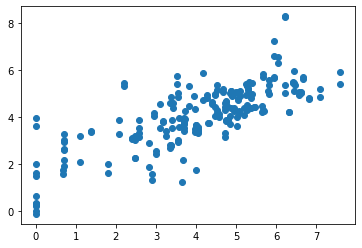

In [755]:
plt.scatter(x=np.log(cal_demo_clean['airbnb_ct']), y=mdf.predict(cal_demo_clean[feats]))

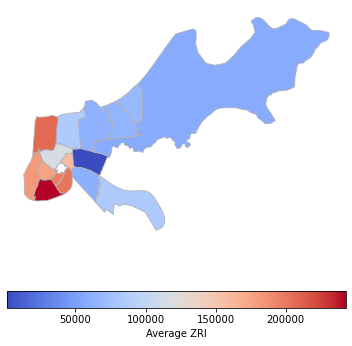

In [922]:
zri_2012 = real_estate_tidy[(real_estate_tidy['type'] == 'ZRI') & (real_estate_tidy['date'] == '2012-12')]
zri_2017 = real_estate_tidy[(real_estate_tidy['type'] == 'ZRI') & (real_estate_tidy['date'] == '2017-01')]
zri_meaned = real_estate_tidy[(real_estate_tidy['date'] >= '2016-01') & (real_estate_tidy['date'] <= '2018-12')].groupby('zipcode').mean()
#print(zri_meaned)

#city_zipcodes = gpd.read_file('austin/austin_area_zip_codes.shp')
#city_zipcodes = gpd.read_file('nashville/geo_export_ce95ea06-82ce-4673-82c7-c568df5a3eec.shp')
#city_zipcodes = gpd.read_file('la/b982f3c3-ffe6-4e4a-b8e6-2bd1eb2c70642020328-1-26h3sc.00ox.shp')
city_zipcodes = gpd.read_file('nola/geo_export_82c5f368-18be-4714-b4da-8f8faa2ab177.shp')
city_zipcodes['zipcode'] = city_zipcodes['zcta5ce10'].astype('float64')
#city_zipcodes['zipcode'] = city_zipcodes['zipcode'].astype('int64')
#ity_zipcodes['zipcode'] = city_zipcodes['zip'].astype('float64')
city_zipcodes = city_zipcodes.merge(zri_meaned, left_on='zipcode', right_on='zipcode', how='left')
data = city_zipcodes
na = data[pd.isna(data['monthly_avg_price'])]
#data
fig, ax = plt.subplots(1, figsize=(5,5))
ax.axis('off')
na.plot(color='white', linewidth=0.8, ax=ax, edgecolor='0.7')
data.plot(column='monthly_avg_price', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.7', legend=True, legend_kwds={'orientation':'horizontal', 'label':'Average ZRI', })
fig.tight_layout()
city = 'nola'
feature = 'prices_mean'
fig.savefig(city+'_'+feature+'.png', format='png', dpi=1000)
plt.show()

In [896]:
calendar_data.set_index('date').groupby('listing_id').rolling(window=3).mean()

listing_id
listing_id date                  
109        2018-05-01         NaN
           2018-04-30         NaN
           2018-04-29       109.0
           2018-04-28       109.0
           2018-04-27       109.0
...                           ...
19038571   2017-06-06  19038571.0
           2017-06-05  19038571.0
           2017-06-04  19038571.0
           2017-06-03  19038571.0
           2017-06-02  19038571.0

[18383955 rows x 1 columns]

In [902]:
pd.to_datetime(calendar_data['date']).dt.year

0           2016
1           2016
2           2016
3           2016
4           2016
            ... 
18383950    2017
18383951    2017
18383952    2017
18383953    2017
18383954    2017
Name: date, Length: 18383955, dtype: int64

{70148, 37013, 37029, 37072, 37076, 37080, 37115, 37138, 78617, 37189, 37201, 37203, 37204, 37205, 37206, 37207, 37208, 37209, 37210, 37211, 37212, 37214, 37215, 37216, 37217, 37218, 37219, 37220, 37221, 37228, 78701, 78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721, 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730, 78218, 78732, 78731, 78734, 78735, 78736, 78737, 78738, 78739, 78733, 78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750, 78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759, 78774, 70111, 70112, 70113, 70114, 70115, 70116, 70117, 70118, 70119, 70121, 70122, 70124, 70125, 70126, 70127, 70128, 70129, 70130, 70131}


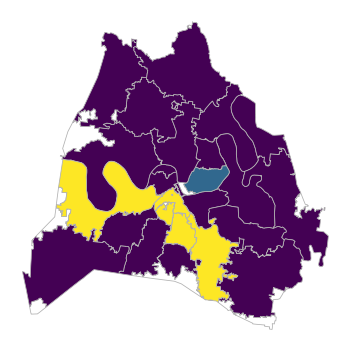

In [941]:
#visualize the different clusters
label_data = pd.read_csv('labels_old.csv')
label_data['zipcode'] = pd.to_numeric(label_data['zipcode'].str[:5])

print({i for i in label_data['zipcode']})
#city_zipcodes = gpd.read_file('austin/austin_area_zip_codes.shp')
city_zipcodes = gpd.read_file('nashville/geo_export_ce95ea06-82ce-4673-82c7-c568df5a3eec.shp')
#city_zipcodes = gpd.read_file('nola/geo_export_82c5f368-18be-4714-b4da-8f8faa2ab177.shp')
#city_zipcodes['zipcode'] = city_zipcodes['zcta5ce10'].astype('float64')
#city_zipcodes['zipcode'] = city_zipcodes['zipcode'].astype('int64')
city_zipcodes['zipcode'] = city_zipcodes['zip'].astype('float64')
city_zipcodes = city_zipcodes.merge(label_data, left_on='zipcode', right_on='zipcode', how='left')
data = city_zipcodes
na = data[pd.isna(data['label'])]
#data
fig, ax = plt.subplots(1, figsize=(5,5))
ax.axis('off')
na.plot(color='white', linewidth=0.8, ax=ax, edgecolor='0.7')
data.plot(column='label', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.7')#, legend=True, legend_kwds={'orientation':'horizontal', 'label':'Average ZRI', })
fig.tight_layout()
city = 'nashville'
feature = 'labels'
fig.savefig(city+'_'+feature+'.png', format='png', dpi=1000)
plt.show()